# 🩺 Diabetes Prediction – Balanced Dataset (50/50 Split) | BRFSS 2015

This project analyzes health indicators related to diabetes using a balanced dataset (equal number of diabetic and non-diabetic cases) and builds predictive models to identify key contributing factors.

---

## 📁 Dataset Information

- **Dataset Name:** `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`
- **Source:** [Kaggle – Diabetes Health Indicators](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)
- **Rows × Columns:** `70,692 × 22`
- **Target Column:** `Diabetes_binary` (1 = Diabetes, 0 = No Diabetes)

---

## 🎯 Project Goals

- Perform exploratory data analysis (EDA)
- Identify key predictors of diabetes
- Train classification models and compare performance
- Extract interpretable feature importance

---




## 📥 Import Libraries & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
sns.set(style="whitegrid")


# Load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv


In [ ]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
print(df.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


### 🧾 Data Dictionary (Key Variables)

| Column                 | Description                                  |
|------------------------|----------------------------------------------|
| Diabetes_binary        | 0 = No diabetes, 1 = Diabetes (target)       |
| HighBP                 | High blood pressure (0 = No, 1 = Yes)        |
| HighChol               | High cholesterol                             |
| CholCheck              | Had cholesterol check in past 5 years        |
| BMI                    | Body Mass Index                              |
| Smoker                 | Has smoked 100+ cigarettes in lifetime       |
| Stroke                 | Has had a stroke                             |
| HeartDiseaseorAttack   | Coronary heart disease or myocardial infarction |
| PhysActivity           | Physical activity in past 30 days            |
| Fruits                 | Eats fruits at least once per day            |
| Veggies                | Eats vegetables at least once per day        |
| HvyAlcoholConsump      | Heavy alcohol consumption                    |
| AnyHealthcare          | Has any health coverage                      |
| NoDocbcCost            | Could not see doctor due to cost             |
| GenHlth                | General health (1 = excellent, 5 = poor)     |
| MentHlth               | Poor mental health days in past 30 days      |
| PhysHlth               | Poor physical health days in past 30 days    |
| DiffWalk               | Difficulty walking or climbing stairs        |
| Sex                    | 0 = Female, 1 = Male                          |
| Age                    | Ordinal age groups (e.g., 1 = 18-24, ..., 13 = 80+) |
| Education              | Education level (1 = never attended, 6 = college grad) |
| Income                 | Income level (1 = <$10k, 8 = >$75k)           |

## 🧹 Data Cleaning & Mapping
---



**Create mappings for categorical columns**

1️⃣ **Map Age Groups**

In [ ]:
age_mapping = {
    1.0: "18-24",
    2.0: "25-29",
    3.0: "30-34",
    4.0: "35-39",
    5.0: "40-44",
    6.0: "45-49",
    7.0: "50-54",
    8.0: "55-59",
    9.0: "60-64",
    10.0: "65-69",
    11.0: "70-74",
    12.0: "75-79",
    13.0: "80+"
}
df["AgeGroup"] = df["Age"].map(age_mapping)

2️⃣ **Map Education Levels**

In [ ]:
education_mapping = {
    1.0: "Never Attended",
    2.0: "Elementary",
    3.0: "Some High School",
    4.0: "High School Grad",
    5.0: "Some College",
    6.0: "College Graduate"
}
df["EducationLevel"] = df["Education"].map(education_mapping)

3️⃣ **Map Income Levels**

In [ ]:
income_mapping = {
    1.0: "<$10k",
    2.0: "$10k-$15k",
    3.0: "$15k-$20k",
    4.0: "$20k-$25k",
    5.0: "$25k-$35k",
    6.0: "$35k-$50k",
    7.0: "$50k-$75k",
    8.0: ">$75k"
}
df["IncomeLevel"] = df["Income"].map(income_mapping)

4️⃣ **Map Sex**

In [ ]:
sex_mapping = {
    0.0: "Female",
    1.0: "Male"
}
df["SexLabel"] = df["Sex"].map(sex_mapping)

In [ ]:
df[["Age", "AgeGroup", "Education", "EducationLevel", "Income", "IncomeLevel", "Sex", "SexLabel"]].head()

,Age,AgeGroup,Education,EducationLevel,Income,IncomeLevel,Sex,SexLabel
0,4.0,35-39,6.0,College Graduate,8.0,>$75k,1.0,Male
1,12.0,75-79,6.0,College Graduate,8.0,>$75k,1.0,Male
2,13.0,80+,6.0,College Graduate,8.0,>$75k,1.0,Male
3,11.0,70-74,6.0,College Graduate,8.0,>$75k,1.0,Male
4,8.0,55-59,5.0,Some College,8.0,>$75k,0.0,Female


📊 ✨ **EDA Workflow for Diabetes Health Indicators Dataset**
---


## 📋 Dataset Overview

We begin by inspecting the shape, columns, and previewing the data.

In [ ]:
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
df.head()

Dataset shape: (70692, 26)

Column names: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'AgeGroup', 'EducationLevel', 'IncomeLevel', 'SexLabel']


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,AgeGroup,EducationLevel,IncomeLevel,SexLabel
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,30.0,0.0,1.0,4.0,6.0,8.0,35-39,College Graduate,>$75k,Male
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,12.0,6.0,8.0,75-79,College Graduate,>$75k,Male
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,10.0,0.0,1.0,13.0,6.0,8.0,80+,College Graduate,>$75k,Male
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,3.0,0.0,1.0,11.0,6.0,8.0,70-74,College Graduate,>$75k,Male
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,8.0,5.0,8.0,55-59,Some College,>$75k,Female


## ⚖️ Class Balance

Visualizing the distribution of the target variable (`Diabetes_binary`) to confirm class balance.

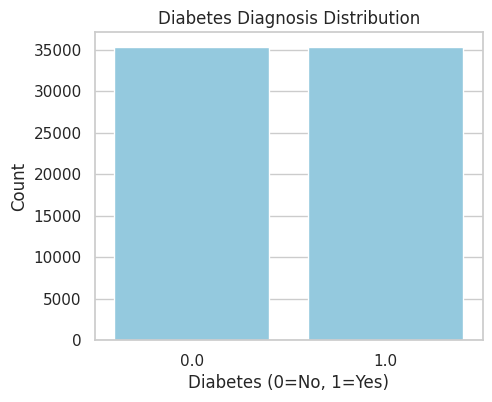

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="Diabetes_binary", data=df, color="skyblue")
plt.title("Diabetes Diagnosis Distribution")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

## 📈 Summary Statistics

Quick descriptive statistics for all numeric variables.

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 📊 Feature Distributions

Visualizing distributions of important variables.

✅ BMI:

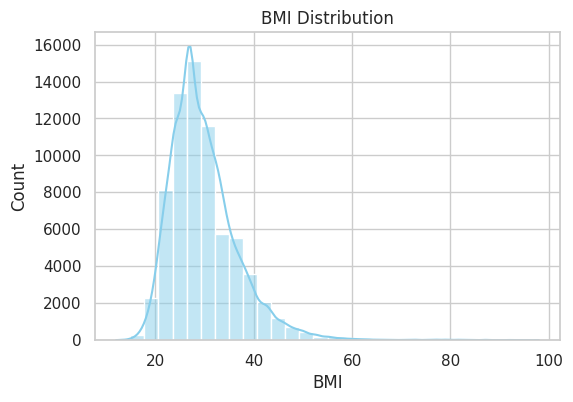

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["BMI"], bins=30, kde=True, color="skyblue")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

✅ Age:

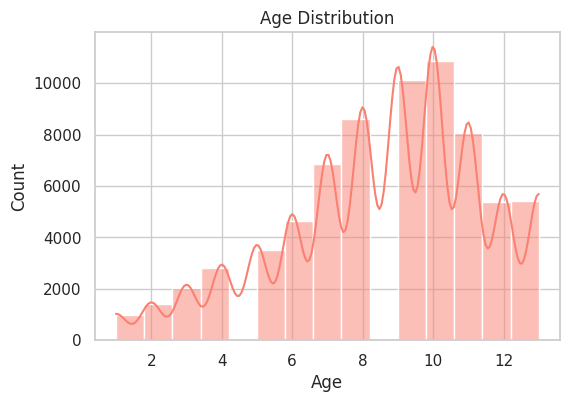

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=15, kde=True, color="salmon")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

✅ General Health:

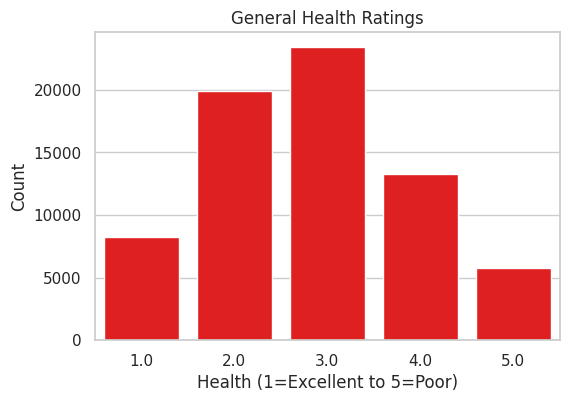

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="GenHlth", data=df, color="red")
plt.title("General Health Ratings")
plt.xlabel("Health (1=Excellent to 5=Poor)")
plt.ylabel("Count")
plt.show()

✅ Physical Activity:

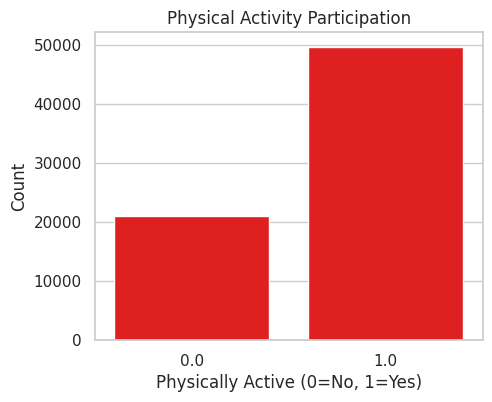

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="PhysActivity", data=df, color="red")
plt.title("Physical Activity Participation")
plt.xlabel("Physically Active (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

✅ Age Group Distribution

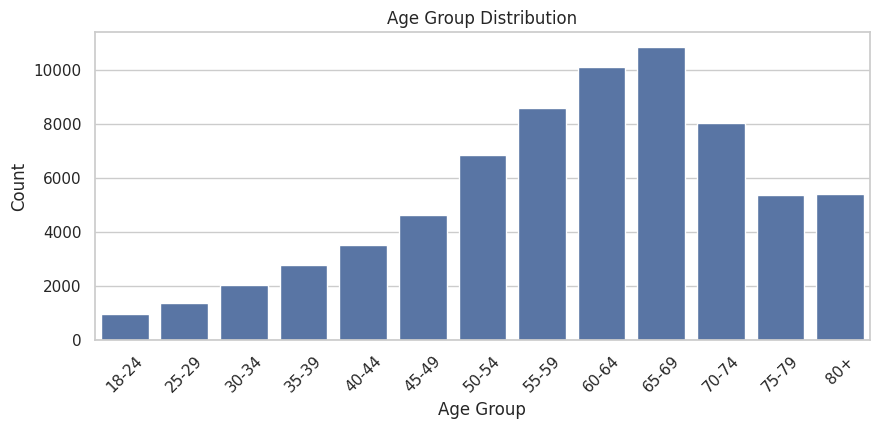

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="AgeGroup", data=df, order=[
    "18-24","25-29","30-34","35-39","40-44",
    "45-49","50-54","55-59","60-64","65-69",
    "70-74","75-79","80+"
])
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

✅ Education Level Distribution

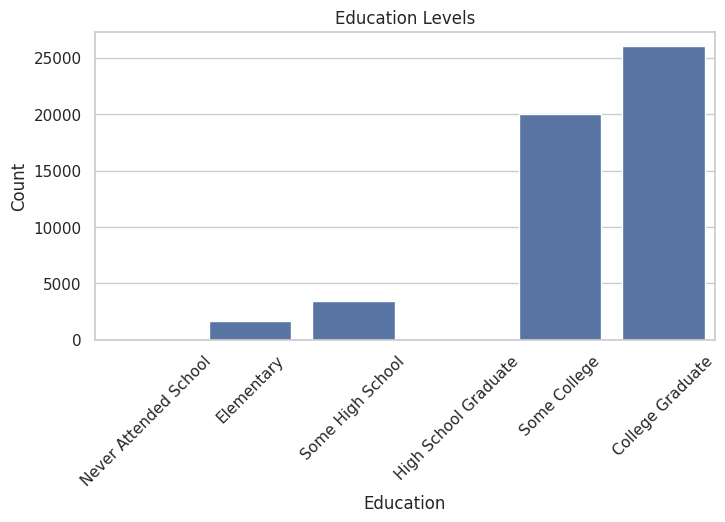

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="EducationLevel", data=df, order=[
    "Never Attended School",
    "Elementary",
    "Some High School",
    "High School Graduate",
    "Some College",
    "College Graduate"
])
plt.title("Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

✅ Income Level Distribution

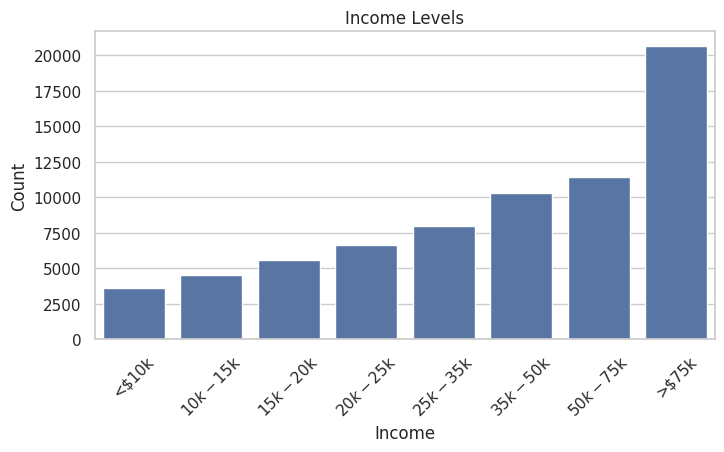

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="IncomeLevel", data=df, order=[
    "<$10k",
    "$10k-$15k",
    "$15k-$20k",
    "$20k-$25k",
    "$25k-$35k",
    "$35k-$50k",
    "$50k-$75k",
    ">$75k"
])
plt.title("Income Levels")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

✅ Diabetes Prevalence by Sex

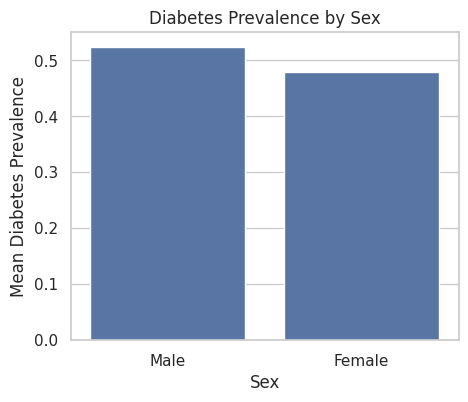

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(x="SexLabel", y="Diabetes_binary", data=df, errorbar=None)
plt.title("Diabetes Prevalence by Sex")
plt.xlabel("Sex")
plt.ylabel("Mean Diabetes Prevalence")
plt.show()

✅ Diabetes Prevalence by Age Group

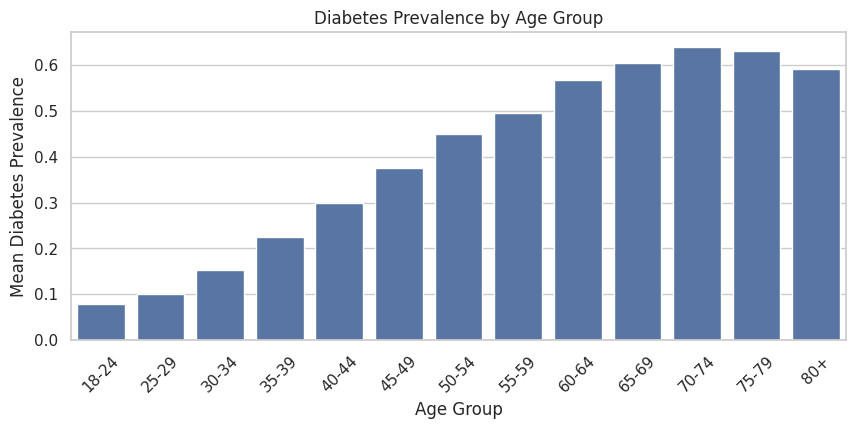

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x="AgeGroup", y="Diabetes_binary", data=df, errorbar=None, order=[
    "18-24","25-29","30-34","35-39","40-44",
    "45-49","50-54","55-59","60-64","65-69",
    "70-74","75-79","80+"
])
plt.title("Diabetes Prevalence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Diabetes Prevalence")
plt.xticks(rotation=45)
plt.show()

## 🔗 Correlation Matrix

Visualizing correlations among all numeric variables.

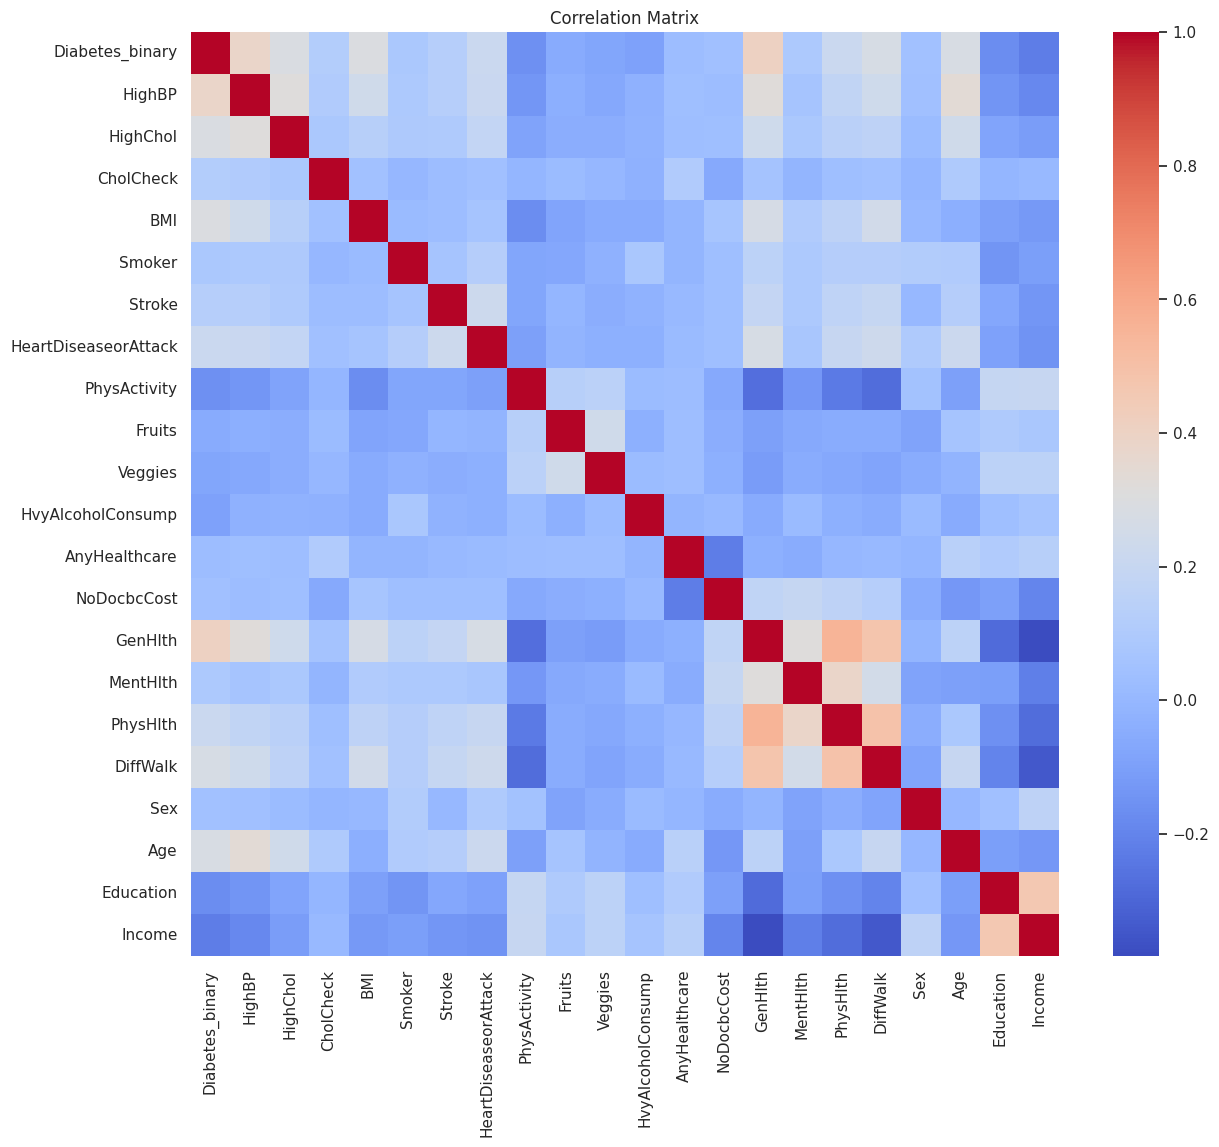

In [ ]:
df_subset = df.select_dtypes(include=["number"])
plt.figure(figsize=(14,12))
sns.heatmap(df_subset.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

## 🚩 Outlier Detection

Identifying potential outliers in numeric variables using boxplots and IQR.

✅ BMI Boxplot:

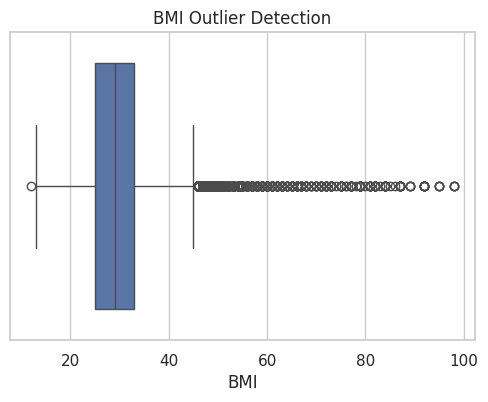

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["BMI"])
plt.title("BMI Outlier Detection")
plt.xlabel("BMI")
plt.show()

✅ PhysHlth Boxplot:

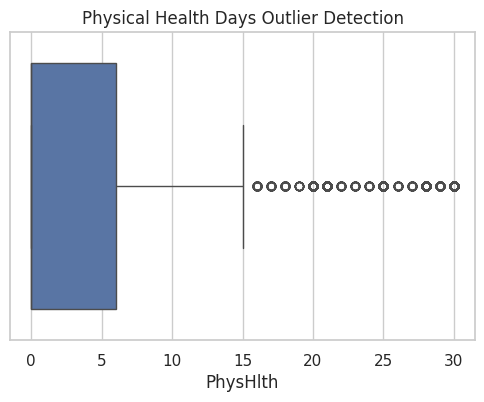

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["PhysHlth"])
plt.title("Physical Health Days Outlier Detection")
plt.xlabel("PhysHlth")
plt.show()

✅ IQR Calculation for BMI:

In [ ]:
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1
lower_bmi = Q1 - 1.5 * IQR
upper_bmi = Q3 + 1.5 * IQR

bmi_outliers = df[(df["BMI"] < lower_bmi) | (df["BMI"] > upper_bmi)]
print("Number of BMI outliers:", bmi_outliers.shape[0])

Number of BMI outliers: 2181


✅ IQR Calculation for PhysHlth:

In [ ]:
Q1 = df["PhysHlth"].quantile(0.25)
Q3 = df["PhysHlth"].quantile(0.75)
IQR = Q3 - Q1
lower_phys = Q1 - 1.5 * IQR
upper_phys = Q3 + 1.5 * IQR

phys_outliers = df[(df["PhysHlth"] < lower_phys) | (df["PhysHlth"] > upper_phys)]
print("Number of PhysHlth outliers:", phys_outliers.shape[0])

Number of PhysHlth outliers: 10624


In [ ]:
bmi_cap = df["BMI"].quantile(0.95)
df["BMI"] = df["BMI"].apply(lambda x: bmi_cap if x > bmi_cap else x)

**Handling Outliers:**

- BMI: Outliers above the 95th percentile were capped to reduce skew and maintain data integrity.
- PhysHlth: No capping performed, as all values (0–30) represent valid counts of physically unhealthy days.


## ✅ EDA Summary

- The dataset shows a balanced class distribution.
- BMI and PhysHlth have some outliers worth reviewing.
- Correlation analysis indicates which features may be predictive.
- Distributions highlight skewness and typical ranges.

🎯 **Feature Importance Workflow**
---



In [ ]:
# Features (all columns except target)
# Drop the target + all string label columns
X = df.drop([
    "Diabetes_binary",  # target
    "AgeGroup",         # string label
    "IncomeLevel",      # string label
    "EducationLevel",   # string label
    "SexLabel"          # string label
], axis=1)


# Target variable
y = df["Diabetes_binary"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Create a dataframe of feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp_df

,Feature,Importance
3,BMI,0.167763
18,Age,0.126524
13,GenHlth,0.107341
20,Income,0.085426
0,HighBP,0.075996
15,PhysHlth,0.069127
19,Education,0.056920
14,MentHlth,0.051552
1,HighChol,0.041040
8,Fruits,0.028727


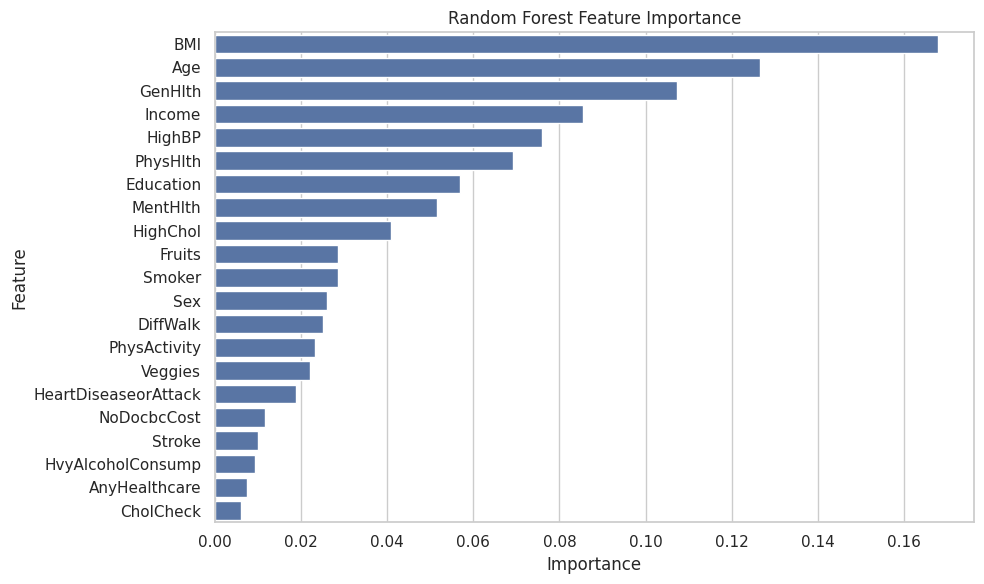

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_imp_df
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 🎯 Feature Importance Insights

The Random Forest classifier revealed the following:

- **BMI** was the strongest predictor of diabetes in this dataset, aligning with known clinical risk factors.
- **Age**, **General Health**, **Income**, and **High Blood Pressure** were also major contributors.
- Lifestyle factors such as fruit and vegetable consumption, smoking, and alcohol use had relatively low importance in this sample.
- Some chronic disease variables (Stroke, Heart Disease) showed less predictive power, potentially due to overlaps with other variables.

🎯 **Modeling Workflow**
---



🟢 1️⃣ **Logistic Regression**

---




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

# Initialize logistic regression
logreg = LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:,1]

# Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Accuracy:", round(accuracy_lr, 3))
print("Logistic Regression AUC:", round(auc_lr, 3))


Logistic Regression Accuracy: 0.747
Logistic Regression AUC: 0.825


🟢 2️⃣ **Random Forest**

---



In [ ]:
# Already imported RandomForestClassifier earlier

# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Accuracy:", round(accuracy_rf, 3))
print("Random Forest AUC:", round(auc_rf, 3))


Random Forest Accuracy: 0.733
Random Forest AUC: 0.811


🟢 2️⃣ **XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb),3))
print("XGBoost AUC:", round(roc_auc_score(y_test, y_proba_xgb),3))

XGBoost Accuracy: 0.747
XGBoost AUC: 0.824


## 🤖 Model Performance

| Model               | Accuracy | AUC  |
|---------------------|----------|------|
| Logistic Regression | 0.747    | 0.825|
| Random Forest       | 0.733    | 0.811|
| XGBoost             | 0.747    | 0.824|

✅ Logistic Regression and XGBoost gave the best results.  
📌 Logistic Regression coefficients provided helpful insights on feature impact.


## 🧭 **Logistic Regression Coefficient Interpretation**



In [ ]:
# Get coefficients
coef = logreg.coef_[0]
features = X.columns

# Create DataFrame
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
2,CholCheck,1.309472
0,HighBP,0.707074
13,GenHlth,0.589218
1,HighChol,0.585565
17,Sex,0.267218
6,HeartDiseaseorAttack,0.262333
5,Stroke,0.196014
18,Age,0.155074
16,DiffWalk,0.093952
3,BMI,0.092248


🟢 **Visualize Coefficients**

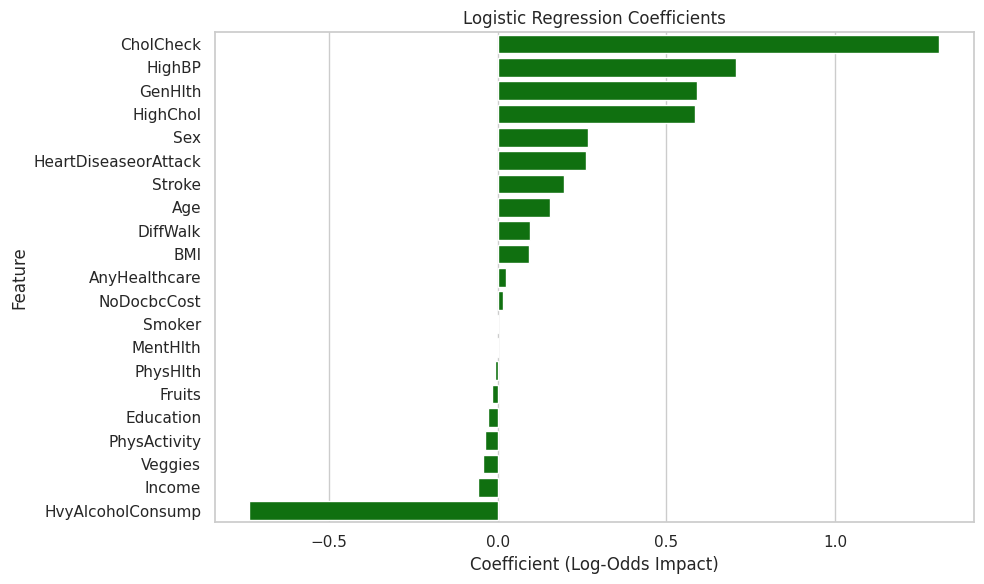

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=coef_df,
    color='green'
)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient (Log-Odds Impact)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 🧠 Key Insights

- **Positive Predictors**: HighBP, GenHlth, BMI, CholCheck
- **Negative Predictors**: HvyAlcoholConsump, Higher Income
- **Health behavior and lifestyle** play a big role in diabetes risk


## 📌 Conclusion
- **Top Risk Indicators**: BMI, General Health, High Blood Pressure, Age
- **Logistic Regression** achieved highest AUC (0.825), making it most interpretable and effective
- Lifestyle and socioeconomic indicators contribute significantly to diabetes prediction

---**bold text**

## 📂 Files Included

📄 diabetes_binary_5050split_health_indicators_BRFSS2015.csv

📓 diabetes_5050_balanced_analysis.ipynb

📊 plots/

├── class_balance.png

├── bmi_distribution.png

├── physhealth_boxplot.png

├── feature_importance.png

├── correlation_heatmap.png

└── logistic_coefficients.png


## ✅ Next Steps
- Analyze the imbalanced datasets
- Try SHAP for advanced model explainability
- Build an interactive Power BI dashboard
